# Отчет по лабораторным работам 2.2/2.3

## Изучение спектров атомов водорода и молекулярного йода
Конкс Эрик, Б01-818

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import odr

neon_deg = [2928., 2862., 2850., 2824., 2800., 2790., 2754., 2746., 2728., 2714., 2700., 2680., 
            2656., 2648., 2628., 2618., 2600., 2576., 2560., 2528., 2514., 2252., 2210., 2206.]
neon_λ = [6929., 6717., 6678., 6599., 6533., 6507., 6402., 6383., 6334., 6305., 6267., 6217.,
          6164., 6143., 6096., 6074., 6030., 5976., 5945., 5882., 5852., 5401., 5341., 5331.]

mercury_deg = [2910., 2686., 2482., 2472., 2292., 1870., 1204., 650.]
mercury_λ = [6907., 6234., 5791., 5770., 5461., 4916., 4358., 4047.]

x = sorted(neon_deg + mercury_deg[2:])
x_err = [5. for _ in range(len(x))]
y = sorted(neon_λ + mercury_λ[2:])
print(pd.DataFrame({'deg, °': x, 'λ, Å': y}))

    deg, °    λ, Å
0    650.0  4047.0
1   1204.0  4358.0
2   1870.0  4916.0
3   2206.0  5331.0
4   2210.0  5341.0
5   2252.0  5401.0
6   2292.0  5461.0
7   2472.0  5770.0
8   2482.0  5791.0
9   2514.0  5852.0
10  2528.0  5882.0
11  2560.0  5945.0
12  2576.0  5976.0
13  2600.0  6030.0
14  2618.0  6074.0
15  2628.0  6096.0
16  2648.0  6143.0
17  2656.0  6164.0
18  2680.0  6217.0
19  2700.0  6267.0
20  2714.0  6305.0
21  2728.0  6334.0
22  2746.0  6383.0
23  2754.0  6402.0
24  2790.0  6507.0
25  2800.0  6533.0
26  2824.0  6599.0
27  2850.0  6678.0
28  2862.0  6717.0
29  2928.0  6929.0


In [2]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [18, 14]

$$\lambda=\lambda_0 + \frac{C}{\theta - \theta_0}$$

In [3]:
f_spec = lambda p, x: p[0] / (x - p[1]) + p[2]
quad_model = odr.Model(f_spec)
data = odr.RealData(x, y, sx=x_err)
modr = odr.ODR(data, quad_model, beta0=[-6*10**6, 3925.0, 2341.0])
out = modr.run()
beta_opt = out.beta
#beta_err = np.sqrt(np.diag(out.cov_beta))
beta_err = out.sd_beta
beta_name = ['C0*10^3', '𝜃0     ', '𝜆0     ']
beta_opt[0] = beta_opt[0] / 10**3
beta_err[0] = beta_opt[0] / 10**3
print('Fit parameter neon y = C0 / (x - 𝜃0) + 𝜆0')
print('——————————————————————————————————————————————————')
for i in range(len(beta_opt)):
    print(f"{beta_name[i]} = {beta_opt[i]} +- {beta_err[i]}")
    print("          {:.0f} +- {:.0f}".format(beta_opt[i], beta_err[i]))

beta_opt[0] = beta_opt[0] * 10**3
beta_err[0] = beta_err[0] * 10**3
    
print('chisq = {:.2f}'.format(out.res_var * (len(x) - len(beta_opt))))

Fit parameter neon y = C0 / (x - 𝜃0) + 𝜆0
——————————————————————————————————————————————————
C0*10^3 = -6260.936118649652 +- -6.260936118649652
          -6261 +- -6
𝜃0      = 4289.414127182256 +- 3.5943804945886315
          4289 +- 4
𝜆0      = 2327.3593111987248 +- 4.2746578028993625
          2327 +- 4
chisq = 1.47


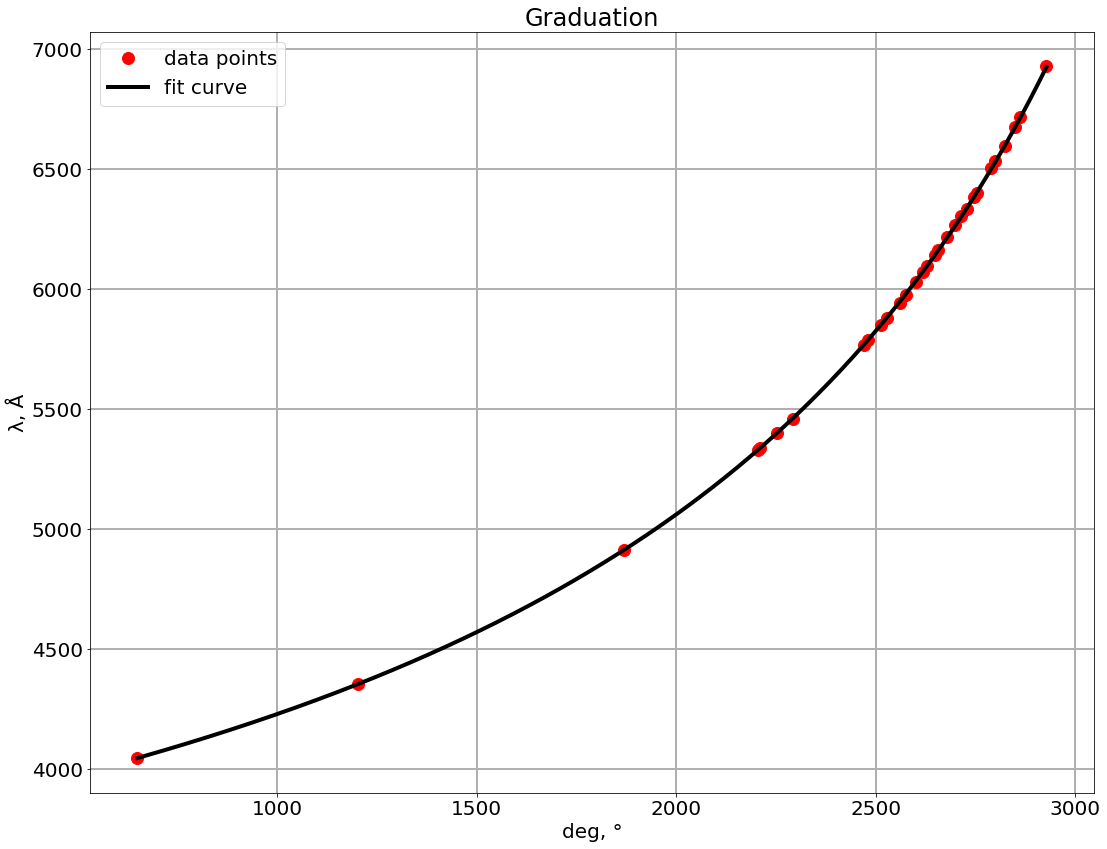

In [4]:
plot = plt.figure(num='Graduation')
plt.plot(x, y, 'ro', label='data points', markersize=12)
x_lin = np.linspace(x[-1], x[0], 1000)
plt.plot(x_lin, [f_spec(beta_opt, x) for x in x_lin], color='black', linewidth=4, label='fit curve')
plt.errorbar(x, y, xerr=x_err, fmt="none", linewidth=4)
plt.grid(linewidth=2)
plt.legend()
plt.title('Graduation')
plt.xlabel('deg, °')
plt.ylabel('λ, Å')
plt.show()

In [5]:
def error(x):
    Δy𝜆0 = beta_err[2]
    ΔyC0 = beta_err[0] / (x - beta_opt[1])
    Δy𝜃0 = -beta_err[1] * beta_opt[0] / (x - beta_opt[1])**2
    return np.sqrt((Δy𝜆0)**2 + (ΔyC0)**2 + (Δy𝜃0)**2)

$$\frac{1}{\lambda_{mn}}=RZ^2(\frac{1}{n^2} - \frac{1}{m^2})$$

In [6]:
n = 2
m = [3, 4, 5]
H_hyd_deg = [2810, 1818, 1182]
H_hyd_th = [6563, 4861, 4341]
H_hyd_name = ['Hα', 'Hβ', 'Hγ']
H_hyd = [f_spec(beta_opt, h) for h in H_hyd_deg]
H_hyd_err = [error(h) for h in H_hyd_deg]
df = pd.DataFrame({'experiment': [f"{int(np.round(H_hyd[i]))} +- {int(np.round(H_hyd_err[i]))}" for i in range(len(H_hyd))],
                   'theory': H_hyd_th})
df.index = ['Hα, Å =', 'Hβ, Å =', 'Hγ, Å =']
print(df)

         experiment  theory
Hα, Å =  6559 +- 12    6563
Hβ, Å =   4861 +- 6    4861
Hγ, Å =   4342 +- 5    4341


In [7]:
balm_x = [1 / n**2 - 1 / m_i**2 for m_i in m]
balm_y = [1 / h * 10**8 for h in H_hyd]
rydb_const = np.divide(balm_y, balm_x)
balm_y_err = [rydb_const[i] * H_hyd_err[i] / H_hyd[i] for i in range(len(rydb_const))]
print(pd.DataFrame({'1/𝜆_mn, cm^-1': balm_y, '1/n^2 - 1/m^2': balm_x, "R, cm^-1": rydb_const}))
rydb_const_av = sum(rydb_const) / len(rydb_const)
rydb_const_err_sys = sum(balm_y_err) / len(balm_y_err) / 3
rydb_const_err_rand = np.sqrt(sum((rydb_const[i] - rydb_const_av)**2 for i in range(len(rydb_const))) / 3)
rydb_const_err = np.sqrt(rydb_const_err_sys**2 + rydb_const_err_rand**2)
print(f"\nR    =  {int(np.round(rydb_const_av))} +- {int(np.round(rydb_const_err))} cm^-1")
print("R_th =  109677.6 cm^-1")

   1/𝜆_mn, cm^-1  1/n^2 - 1/m^2       R, cm^-1
0   15245.304152       0.138889  109766.189894
1   20573.164789       0.187500  109723.545542
2   23029.814731       0.210000  109665.784435

R    =  109719 +- 67 cm^-1
R_th =  109677.6 cm^-1


In [8]:
iodine_deg = [2620, 2516, 2000]
iodine_λ = [f_spec(beta_opt, deg) for deg in iodine_deg]
iodine_λ_err = [error(deg) for deg in iodine_deg]
iodine_e = [4.135667669 * 10**-15 / λ * 10**10 * 3 * 10**8 for λ in iodine_λ]
iodine_e_err = [iodine_e[i] * iodine_λ_err[i] / iodine_λ[i] for i in range(len(iodine_deg))]
df = pd.DataFrame({'iodine_deg, °': iodine_deg, 'iodine_λ, Å': iodine_λ, 'E, эВ': iodine_e})
df.index = ['n_1,0', 'n_1,5', 'n_гр'] 
print(df)
hν1 = 0.027
hν2 = (iodine_e[1] - iodine_e[0]) / 5
hν2_err = iodine_e_err[1] / 5 + iodine_e_err[0] / 5
hνel = iodine_e[0] - hν2/2 + 3*hν1/2
hνel_err = iodine_e_err[0] + hν2_err / 2
Ea = 0.94
D1 = iodine_e[2] - Ea
D1_err = iodine_e_err[2]
D2 = iodine_e[2] - hνel
D2_err = iodine_e_err[2] + hνel_err
print("\nhν2 = {:.3f} +- {:.3f} эВ".format(hν2, hν2_err))
print("hνэл = {:.3f} +- {:.3f} эВ".format(hνel, hνel_err))
print("D1 = {:.3f} +- {:.3f} эВ".format(D1, D1_err))
print("D2 = {:.3f} +- {:.3f} эВ".format(D2, D2_err))

       iodine_deg, °  iodine_λ, Å     E, эВ
n_1,0           2620  6077.738571  2.041385
n_1,5           2516  5857.801537  2.118031
n_гр            2000  5062.092204  2.450963

hν2 = 0.015 +- 0.001 эВ
hνэл = 2.074 +- 0.004 эВ
D1 = 1.511 +- 0.003 эВ
D2 = 0.377 +- 0.007 эВ
